# Assignment 1
## Applied Machine Learning

Andrew Chan 
EBE869


# 1. [20 pts] Define each of the following machine learning terms:  
* **dataset**: a collection of numerical or categorical variables that include features and targets per training example.    
* **training**: dataset that is used to train and optimize the machine learning model.  
 **testing**: dataset separate from the training dataset that is used to evaluate the model.  
 **validation dataset**: additional dataset that is separate from the training and test datasets that is used to estimate generalization performance of the model.   
* **ground truth, label**: Target variables that correctly identify the class of training examples.  
* **pre-processing**: Process of taking raw data, extracting useful features, normalization of features,  and dimensionality reduction.  
  **feature**: Column in a data matrix of predictor variables.   
  **numerical**: Data that is represented with numbers such as integers, floating point, or real numbers.  
  **nominal**: Data that cannot be represented with quantitative value and is not ordinal. For example, class labels for gender (Male, Female). 
* **decision surface**: Multidimensional state space that separates variables into 2 different regions.  
* **model validation**: Evaluation of model performance using test dataset that is separate from the training dataset.   
  **accuracy**: Number of correct predictions divided by the number of total predictions.  
  **cross-validation**: Method of dividing dataset into training and validation subsets to estimate model generalization performance.



# 2. [20 pts] Pick two of the Scikit-learn datasets which are already included in the library 
(i.e. the ones with datasets_load_) and find out the following:
* the number of data points
* the number of features and their types
* the number and name of categories (i.e. the target field)
* the mean (or mode if nominal) of the first two features


In [1]:
import sklearn
import sklearn.datasets
import numpy as np

#### Dataset 1: datasets.load_breast_cancer

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = breast_cancer.data

* the number of data points

In [3]:
len(data)

569

* the number of features and their types


In [4]:
len(data[0])

30

In [5]:
breast_cancer.target_names.dtype

dtype('<U9')

* the number and name of categories (i.e. the target field)


In [6]:
len(breast_cancer.target_names)

2

In [7]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

* the mean (or mode if nominal) of the first two features

In [8]:
np.mean(data[:][0])

118.87261573333332

In [9]:
np.mean(data[:][1])

124.6974489

#### Dataset 2: datasets.load_wine

In [10]:
wine = sklearn.datasets.load_wine()

In [11]:
data = wine.data

* the number of data points

In [12]:
len(data)

178

* the number of features and their types


In [13]:
len(data[0])

13

In [14]:
wine.target_names.dtype

dtype('<U7')

* the number and name of categories (i.e. the target field)


In [15]:
len(wine.target_names)

3

In [16]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

* the mean (or mode if nominal) of the first two features

In [17]:
np.mean(data[:][0])

95.76923076923077

In [18]:
np.mean(data[:][1])

91.85384615384615

# 3. [20 pts] Use the following code piece to display feature pairs:

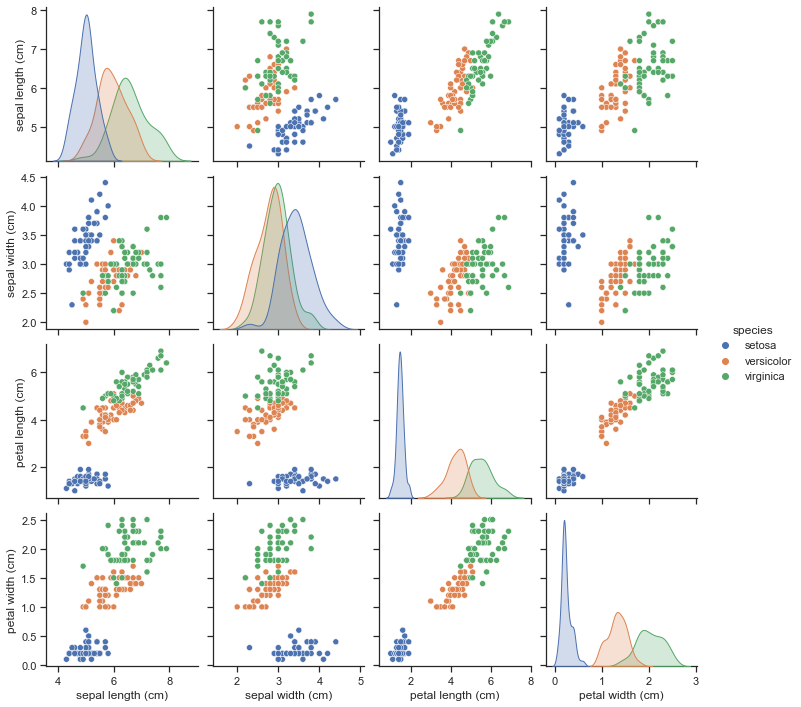

In [19]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn.datasets
import pandas as pd
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
 data= np.c_[iris.data, [iris.target_names[v] for v in
iris.target]],
 columns= iris.feature_names + ['species'])
cols = iris_df.columns.drop('species')
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue='species')



From the plots, which feature(s) shows the most promising discriminating power for
machine learning?
Now plot the features for the datasets you tried in question 2, hoping the number of
features are low and plots look not too small. If there are too many features, then switch the
dataset or update your code (pandas Dataframe line) to look at low number of features at a
time.

## Answer:
The best discriminating features are
* **petal length**
* **petal width**


## Breast Cancer Dataset

In [20]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn.datasets
import pandas as pd
breast_cancer = sklearn.datasets.load_breast_cancer()

In [21]:
list(breast_cancer.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

Since there are so many features, we'll take the first 10 as the the next 20 seem to describe the same features.

In [22]:
num_features = 10
list(breast_cancer.feature_names[:num_features])+ ['species'] 

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'species']

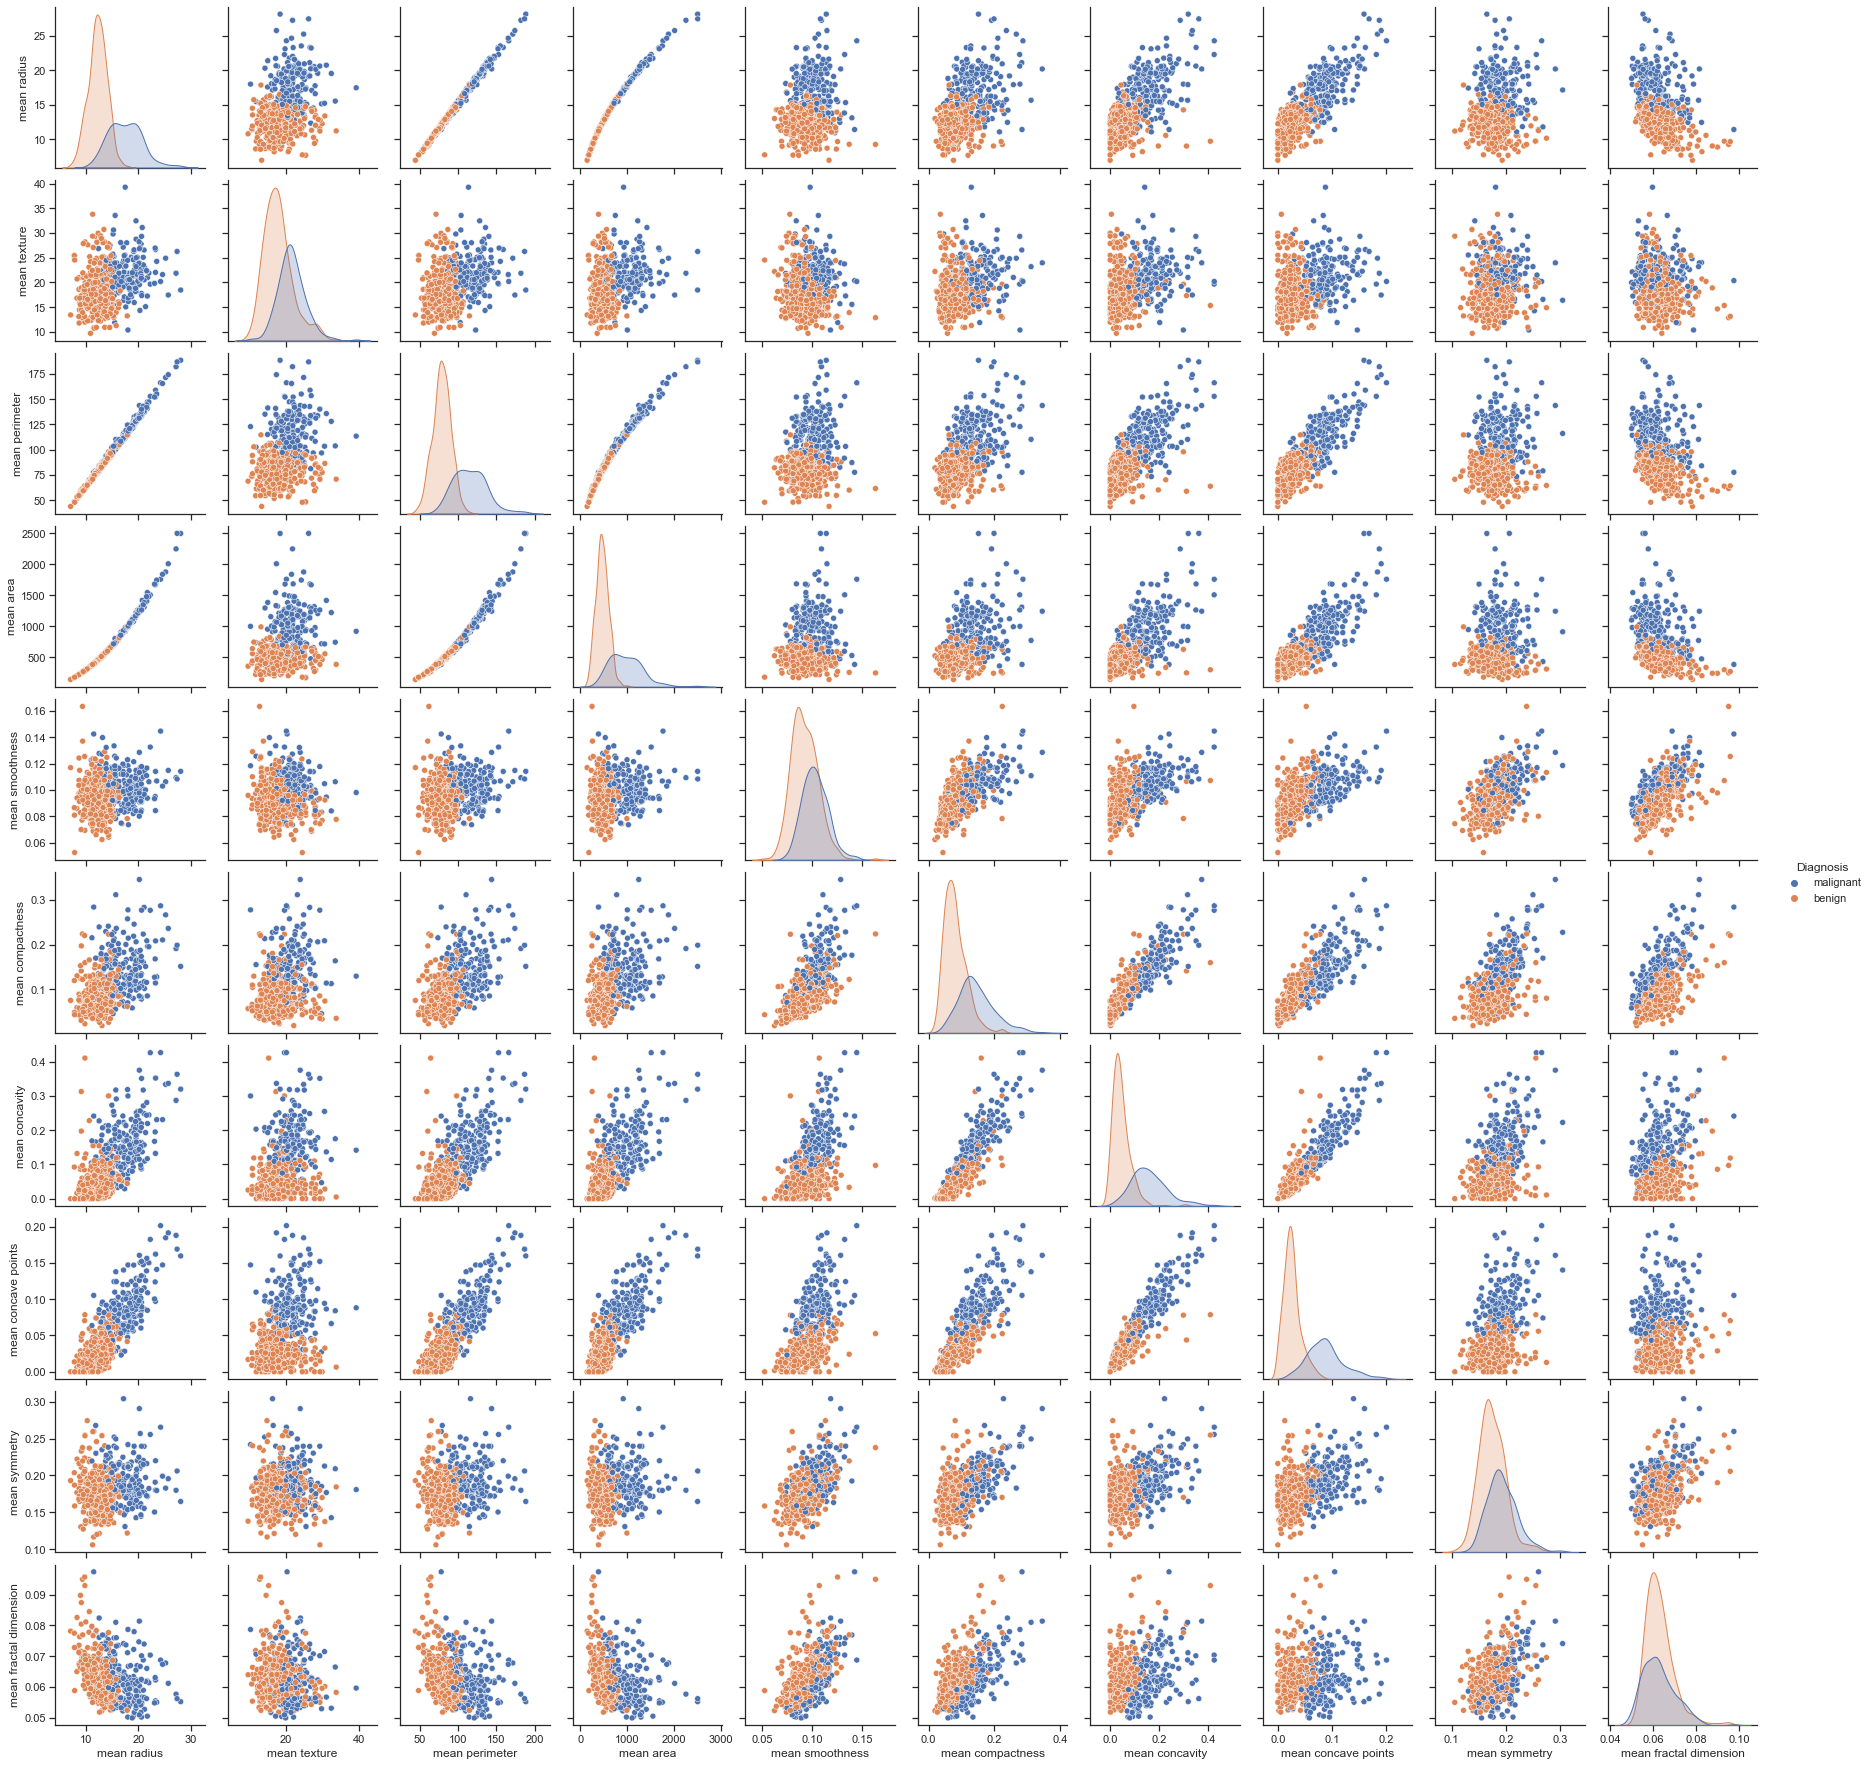

In [23]:

breast_cancer_df = pd.DataFrame(
 data= np.c_[breast_cancer.data[:,:num_features], [breast_cancer.target_names[v] for v in breast_cancer.target]], columns= list(breast_cancer.feature_names[:num_features])+ ['Diagnosis'] )
cols = breast_cancer_df.columns.drop('Diagnosis')
breast_cancer_df[cols] = breast_cancer_df[cols].apply(pd.to_numeric)
g = sns.pairplot(breast_cancer_df, hue='Diagnosis')

## Answer:
These are the best discriminating features for the Breast Cancer Dataset:
* **mean concave points**  
* **mean_concavity**  
* **mean_area**  
* **mean_perimeter**  
* **mean_radius**  



# Wine Dataset

In [24]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn.datasets
import pandas as pd
wine = sklearn.datasets.load_wine()


In [25]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

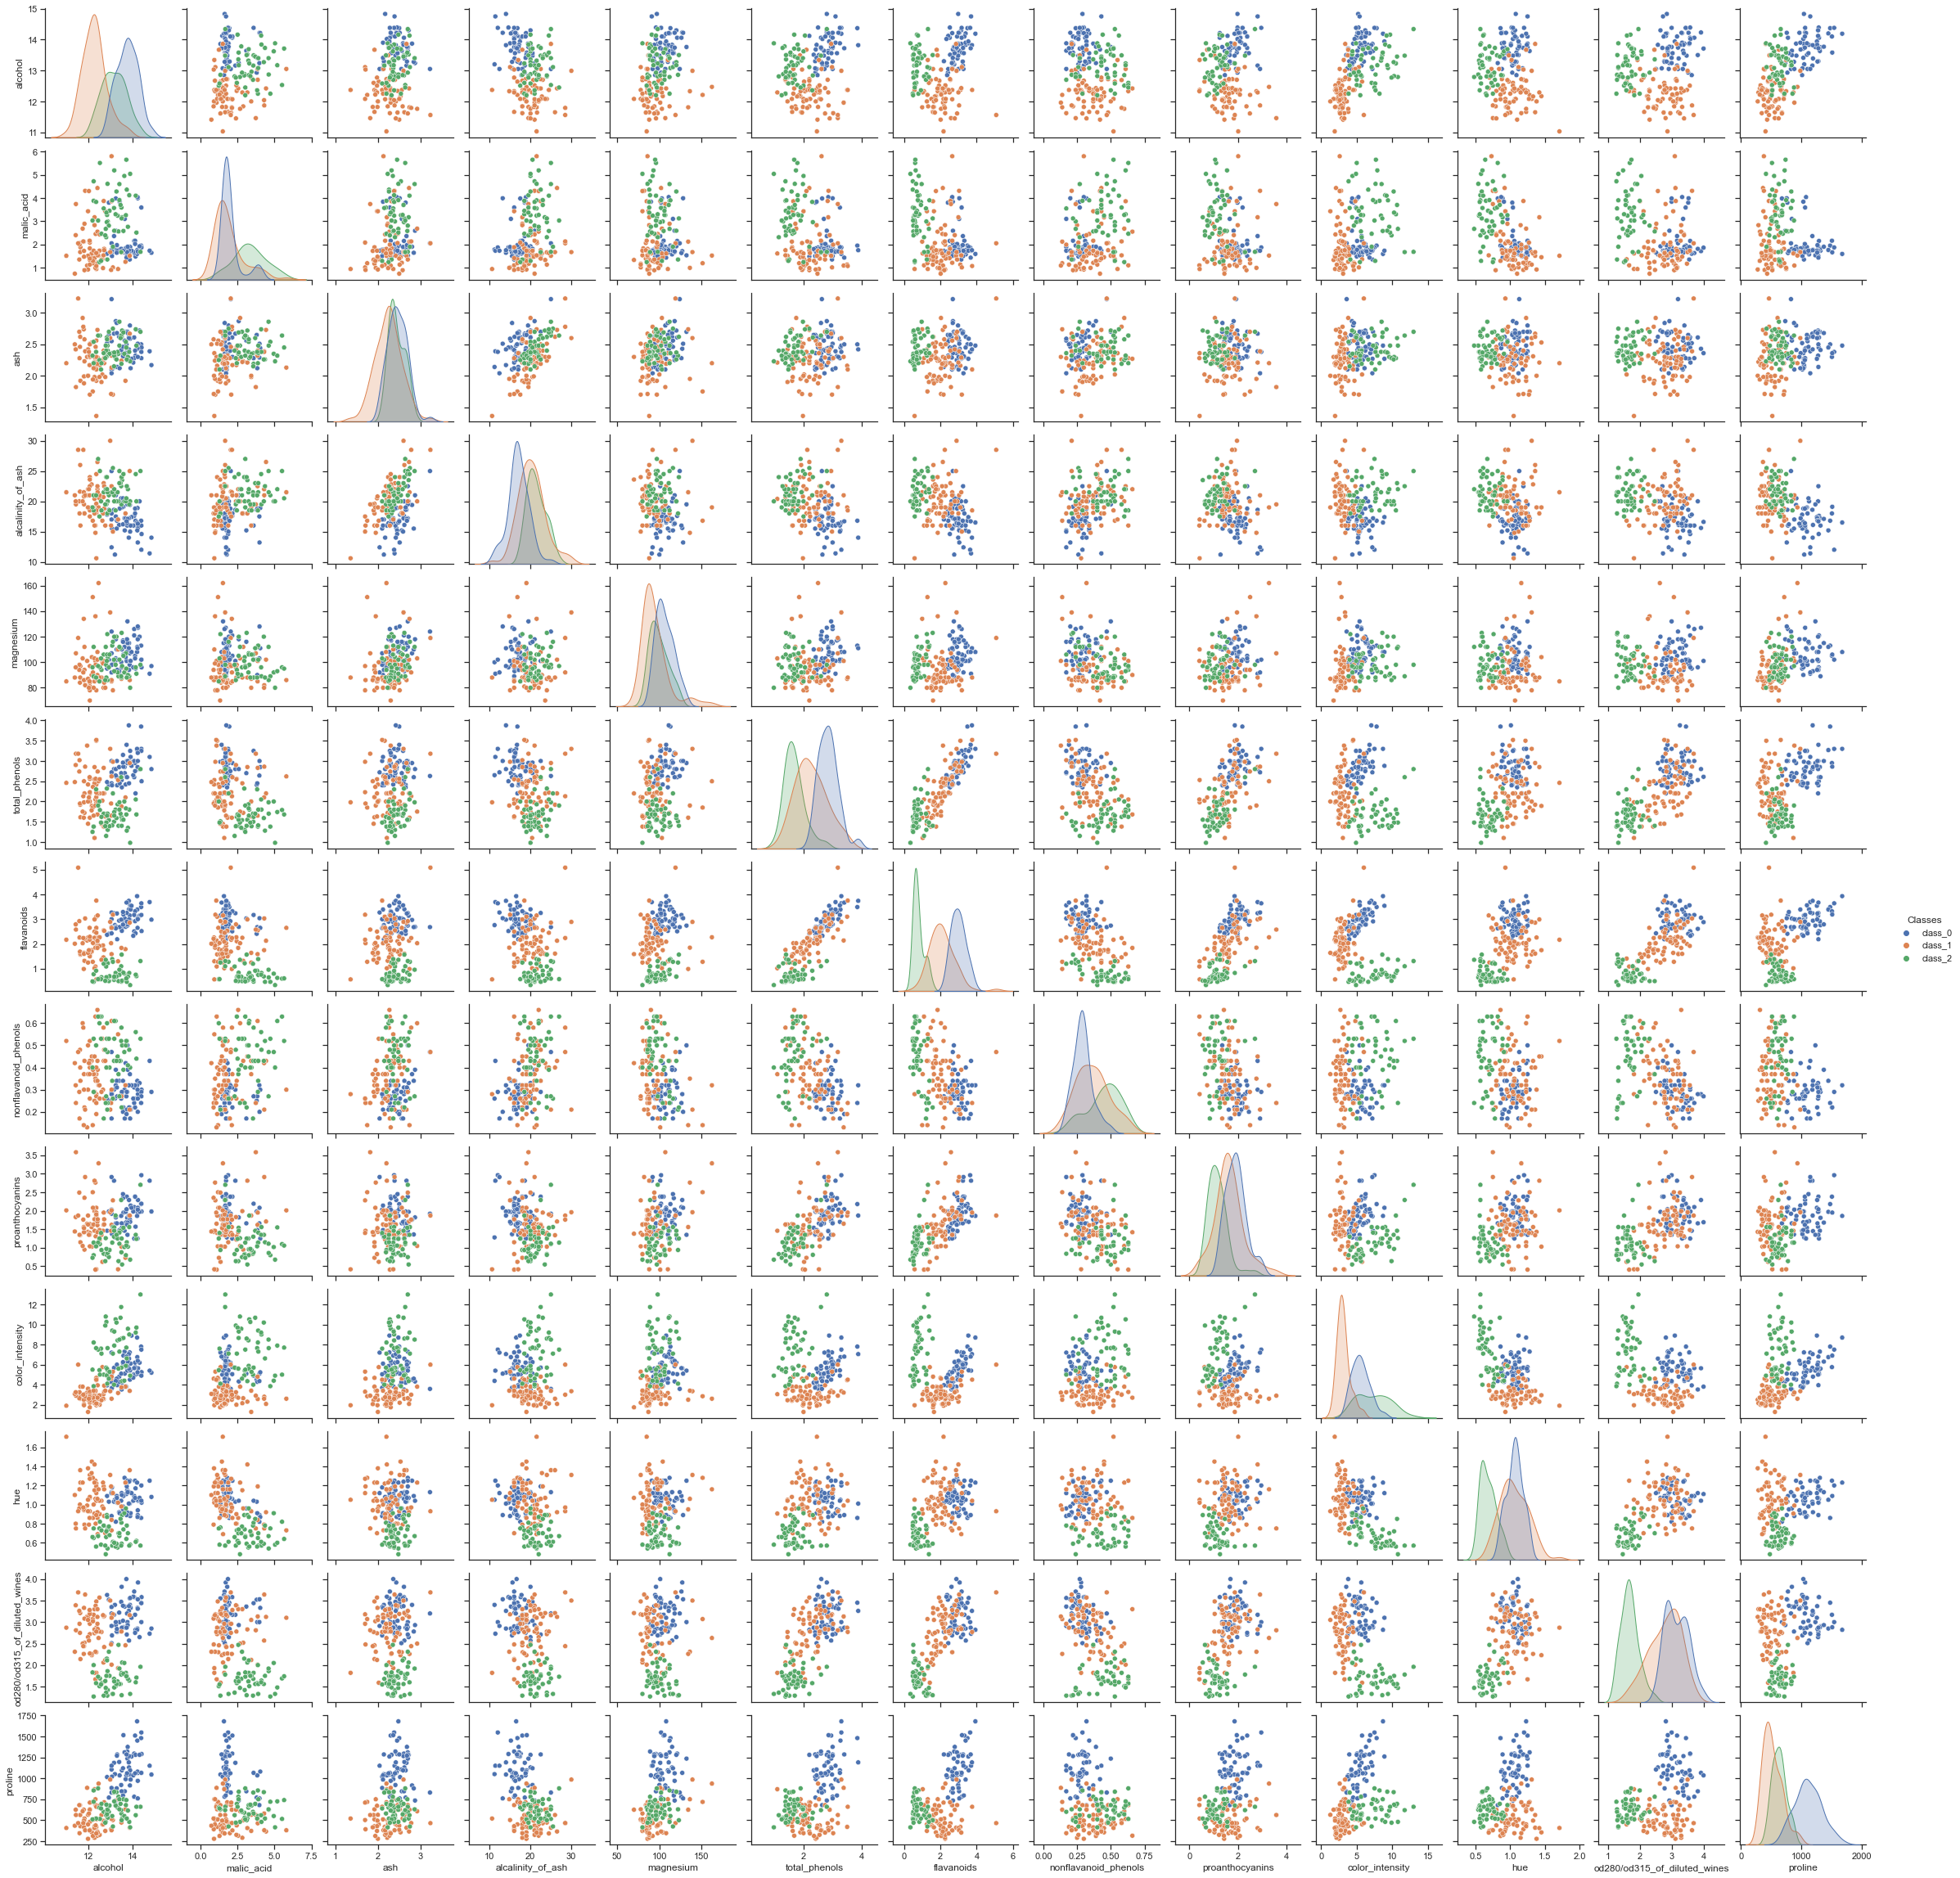

In [26]:
wine_df = pd.DataFrame(
 data= np.c_[wine.data, [wine.target_names[v] for v in wine.target]], columns= list(wine.feature_names)+ ['Classes'] )
cols = wine_df.columns.drop('Classes')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
g = sns.pairplot(wine_df, hue='Classes')

## Answer:
These are the best discriminating features for the Wine Dataset:
* **alcohol**
* **total_phenols**
* **flavanoids**
* **color_intensity**
* **proline**

# 4. [20 pts] Refer to the plots in the previous question and discuss an unsupervised approach to group the dataset into non-overlapping clusters. 


## Iris Dataset
* Which features would you use?

  **I would use the following:**
  * **petal length**
  * **petal width**
  * **sepal width**
* Are three clusters obvious?

  **The three clusters are not obvious. *setosa* is clustered obviously but *versicolor* and *viginica* always seem to be in the same cluster.**
* What about four clusters? Roughly mark them on a few plots.

  **Four clusters is not obvious in this dataset, only two.**

  **Petal Length vs. Sepal Width:**
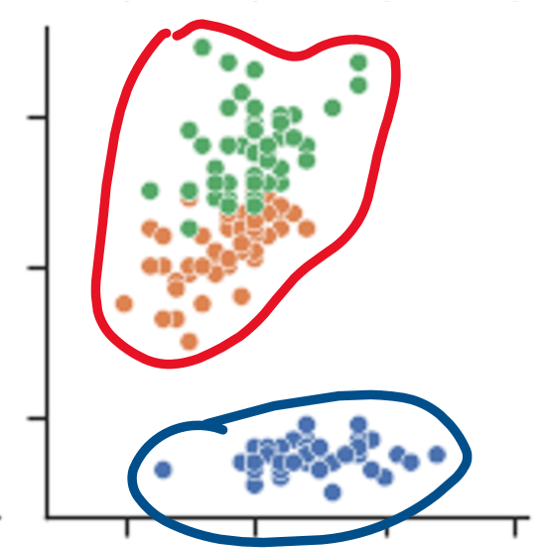

  The x,y coordinates are **(3.5,1)** and **(3,5)**.

   **Petal Length vs. Petal Width:**
  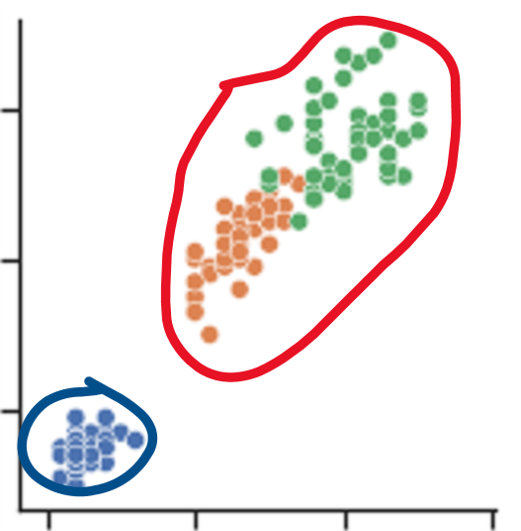
  
  
  The x,y coordinates are **(0.25,1)** and **(2,5)** 
  
* For this problem, is there any relation between classification and clustering since the labels are already given?

  **For this dataset there does not seem to be a relationship between classification and clustering. If we relied on clustering, it would recognize only 2 classes versus 3.**

## Breast Cancer Dataset
* Which features would you use?

 **I would not use any of the features in this dataset for clustering as there is only one cluster**

* Are three clusters obvious?

  **The three clusters are not obvious. Both classes seem to always be in one cluster no matter what the combination of features**
* What about four clusters? Roughly mark them on a few plots.

  **Four clusters is not obvious in this dataset, only one.**

  * **Mean Concave Points vs Mean Concavity**
  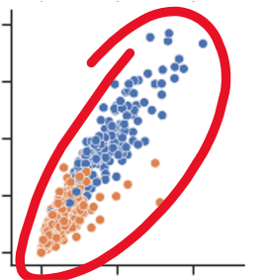

  The x,y coordinates are **(0.2,0.1)**.

  * **Mean Fractal Dimension vs Mean Concave Points**
  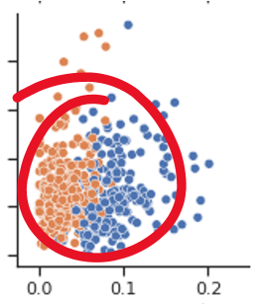

  The x,y coordinates are **(0.9,0.05)**. 
  
* For this problem, is there any relation between classification and clustering since the labels are already given?

  **For this dataset there does not seem to be a relationship between classification and clustering. If we relied on clustering, it would recognize only 1 class versus 2.**

## Wine Dataset
* Which features would you use?

 **I would use the following**
 * **Flavinoids**
 * **Color Intensity**
 * **Hue**

* Are three clusters obvious?

  **The three clusters are not obvious.Class_0 and Class_1 seem to always be in one cluster no matter what the combination of features**
* What about four clusters? Roughly mark them on a few plots.

  **Four clusters is not obvious in this dataset, only two.**

  * **Color Intensity vs. Flavinoids**
 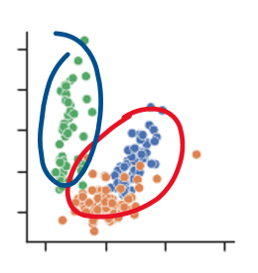

  The x,y coordinates are **(2.5,5)** and **(0.5,0.75)**.

  * **Flavinoids vs. Hue**
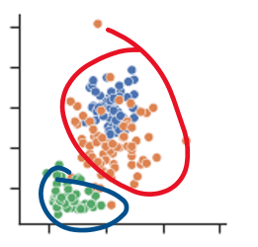

  The x,y coordinates are **(1,2.5)** and **(0.75,0.5)**.
  
* For this problem, is there any relation between classification and clustering since the labels are already given?

  **For this dataset there does not seem to be a relationship between classification and clustering. If we relied on clustering, it would recognize only 2 classes versus 3.**

# 5. [20 pts] Using the scikit-learn class descriptions for Naive Bayes and decision trees, classify the Iris dataset in question 3. 

Your code should be very similar to that in the Module 1 Jupyter notebook. In cell 5 the dataset is divided into two portions, one for training the other for testing. Make sure you use the same input data for the Naive Bayes classifier and decision tree classifier.

## Training size: 50%

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
data = iris.data
n_samples = len(iris.data)
X_train, X_test, y_train, expected = train_test_split(data, iris.target, test_size=0.5, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print(f'Classification report for classifier {classifier}:\n{metrics.accuracy_score(expected, predicted)}\n')
classifierDT = DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)
predicted = classifierDT.predict(X_test)
print(f'Classification report for classifier {classifierDT}:\n{metrics.accuracy_score(expected, predicted)}\n')

Classification report for classifier GaussianNB():
0.9466666666666667

Classification report for classifier DecisionTreeClassifier():
0.96



## Training Size 70%

In [29]:
X_train, X_test, y_train, expected = train_test_split(data, iris.target, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print(f'Classification report for classifier {classifier}:\n{metrics.accuracy_score(expected, predicted)}\n')
classifierDT = DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)
predicted = classifierDT.predict(X_test)
print(f'Classification report for classifier {classifierDT}:\n{metrics.accuracy_score(expected, predicted)}\n')

Classification report for classifier GaussianNB():
1.0

Classification report for classifier DecisionTreeClassifier():
0.9777777777777777



# Answers

Answer the following questions:
* Which classifier has the highest performance?

  **Decision Trees has the highest performance**   
  
  
* More training helps? Verify by increasing the training dataset size.    
  
  **Yes with a larger training dataset size both classifiers increase their accuracy.**  
  
  
* Will the performance plateau? Show it on a plot.

 **Yes the performance plateaus after around 80% training as shown below.**

In [32]:
x = []
y_nb = []
y_dt = []

# 0.9 to 0.99
for testSize in range(1,40,1):
  # create x
  x.append(1-testSize*0.01)

  X_train, X_test, y_train, expected = train_test_split(data, iris.target, test_size=testSize*0.01, random_state=0)

  # get accuracy of Naive Bayes

  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  predicted = classifier.predict(X_test)
  y_nb.append(metrics.accuracy_score(expected, predicted))
  # get accuracy of Decision Tree

  classifierDT = DecisionTreeClassifier()
  classifierDT.fit(X_train, y_train)
  predicted = classifierDT.predict(X_test)
  y_dt.append(metrics.accuracy_score(expected, predicted))


print('test_size', x)
print('Naive Bayes',y_nb)
print('Decision Trees',y_dt)

test_size [0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.9299999999999999, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.8200000000000001, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.6799999999999999, 0.6699999999999999, 0.6599999999999999, 0.6499999999999999, 0.64, 0.63, 0.62, 0.61]
Naive Bayes [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9090909090909091, 0.9166666666666666, 0.9285714285714286, 0.9333333333333333, 0.9411764705882353, 0.9444444444444444, 0.95, 0.9545454545454546, 0.9565217391304348, 0.9583333333333334, 0.9615384615384616, 0.9629629629629629, 0.9655172413793104, 0.9666666666666667, 0.96875, 0.9696969696969697, 0.9714285714285714, 0.9722222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9787234042553191, 0.9791666666666666, 0.96, 0.9615384615384616, 0.9622641509433962, 0.9629629629629629, 0.9464285714285714, 0.9298245614035088, 0.9322033898305084]
Decision Trees [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

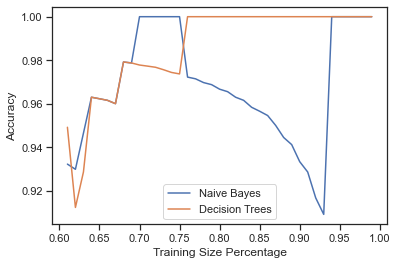

In [31]:
import matplotlib.pyplot as plt 
plt.plot(x, y_nb, label = "Naive Bayes") 
plt.plot(x, y_dt, label = "Decision Trees") 
plt.legend() 
plt.ylabel('Accuracy')
plt.xlabel('Training Size Percentage')
plt.show()